In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
def plot_one(df, which, ax=None):
    if ax is None:
        ax = plt
    xs = list(df.iloc[:, 0])
    ys = df[which]
    ax.plot(xs, ys)

In [34]:
def plot_avg_time(df, ax=None):
    plot_one(df, 'Average running time')

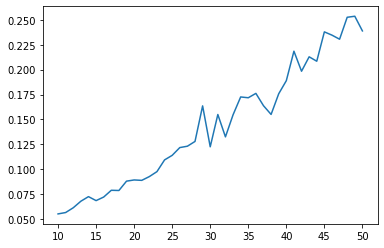

In [35]:
ant_results_df = pd.read_csv('exp_m_10_50_ants.csv')
plot_avg_time(ant_results_df)

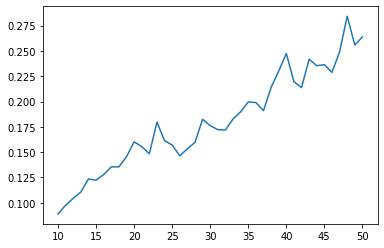

In [31]:
genetic_results_df = pd.read_csv('exp_m_10_50_genetic_500_iters.csv')
plot_avg_time(genetic_results_df)

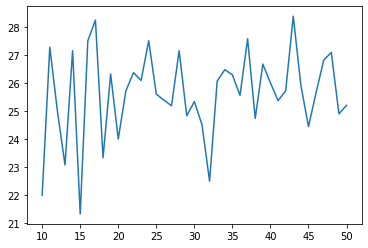

In [37]:
plot_one(genetic_results_df, 'Average quality')

In [3]:
from concurrent.futures import ThreadPoolExecutor
import time

In [7]:
def task(i):
    time.sleep(1)
    print(f'Task {i} done')
    

In [10]:
with ThreadPoolExecutor(max_workers=3) as executor:
    executor.submit(task)
    
print('all done')

all done


,Unnamed: 0,n,Average running time,Running time stdev,Average score,Score stdev,Average quality,Average objective quality
0,0,25,0.024931,0.001410,18.0,0.707107,10.0,NaN
1,1,50,0.031746,0.002641,17.8,0.836660,11.0,NaN
2,2,75,0.040900,0.004084,18.4,0.547723,8.0,NaN
3,3,100,0.048685,0.002223,18.6,0.547723,7.0,NaN
4,4,125,0.042338,0.003329,19.2,0.447214,4.0,NaN
5,5,175,0.060656,0.002372,19.2,0.836660,4.0,NaN
6,6,200,0.082123,0.003926,19.6,0.547723,2.0,NaN
7,7,225,0.099500,0.002808,19.6,0.547723,2.0,NaN
8,8,250,0.190659,0.013658,19.4,0.894427,3.0,NaN
9,9,275,0.141892,0.006192,19.6,0.547723,2.0,NaN


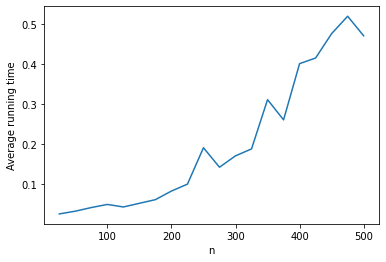

In [29]:
plt.plot(param_range, arts)
plt.xlabel('n')
plt.ylabel('Average running time')
plt.savefig('benchmarking_results/figs/n_ptas_time.png')

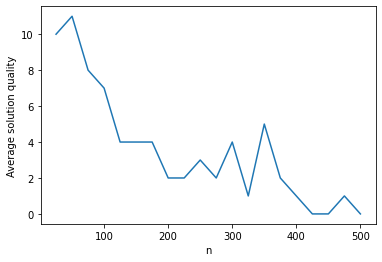

In [30]:
quals = n_df['Average quality']
plt.plot(param_range, quals)
plt.xlabel('n')
plt.ylabel('Average solution quality')
plt.savefig('benchmarking_results/figs/n_ptas_quality.png')

In [38]:
def gimme_graphs(solver_name, col, y_title, what):
    df = pd.read_csv(f'benchmarking_results/testing_n_{solver_name}.csv')
    param_range = list(n_df['n'])
    vals = df[col]
    plt.ylabel(y_title)
    plt.xlabel('n')
    plt.plot(param_range, vals)
    plt.savefig(f'benchmarking_results/figs/n_{solver_name}_{what}.png')
    
    
    

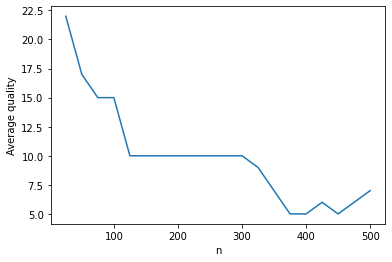

In [40]:
gimme_graphs('ants', 'Average quality', 'Average quality', 'quality')

In [52]:
ptas_times = pd.read_csv('benchmarking_results/testing_n_ptas.csv')['Average quality']
genetic_times = pd.read_csv('benchmarking_results/testing_n_genetic.csv')['Average quality']
ants_times = pd.read_csv('benchmarking_results/testing_n_ants.csv')['Average quality']
nrange = pd.read_csv('benchmarking_results/testing_n_ptas.csv')['n']


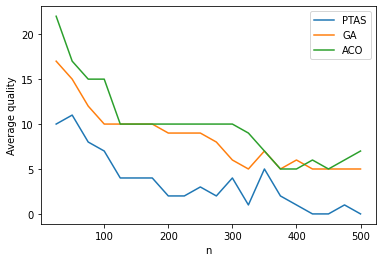

In [53]:
plt.plot(nrange, ptas_times, label='PTAS')
plt.plot(nrange, genetic_times, label='GA')
plt.plot(nrange, ants_times, label='ACO')
plt.xlabel('n')
plt.ylabel('Average quality')
plt.legend()
plt.savefig('benchmarking_results/figs/n_total_q.png')

In [57]:
def yank_graph(path_to_csv, target_var_name, column_name, path_to_fig):
    df = pd.read_csv(path_to_csv)
    varrange = df[target_var_name]
    vals = df[column_name]
    plt.xlabel(target_var_name)
    plt.ylabel(column_name)
    plt.plot(varrange, vals)
    plt.savefig(path_to_fig)
    

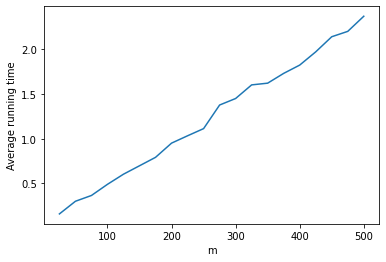

In [58]:
yank_graph(path_to_csv='benchmarking_results/testing_m_genetic.csv',
          target_var_name='m',
          column_name='Average running time',
          path_to_fig='benchmarking_results/figs/m_genetic_time.png')

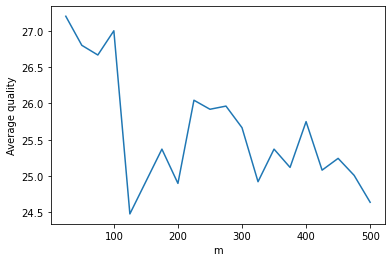

In [59]:
yank_graph(path_to_csv='benchmarking_results/testing_m_genetic.csv',
          target_var_name='m',
          column_name='Average quality',
          path_to_fig='benchmarking_results/figs/m_genetic_quality.png')

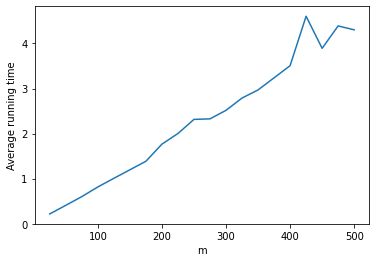

In [62]:
yank_graph(path_to_csv='benchmarking_results/testing_m_ants.csv',
          target_var_name='m',
          column_name='Average running time',
          path_to_fig='benchmarking_results/figs/m_ants_time.png')

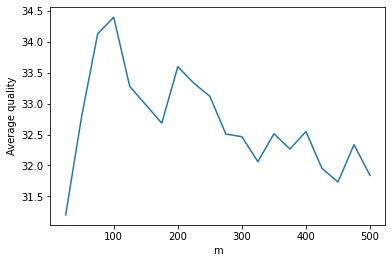

In [63]:
yank_graph(path_to_csv='benchmarking_results/testing_m_ants.csv',
          target_var_name='m',
          column_name='Average quality',
          path_to_fig='benchmarking_results/figs/m_ants_quality.png')

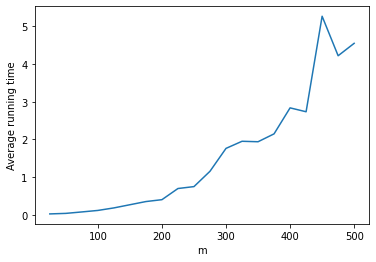

In [64]:
yank_graph(path_to_csv='benchmarking_results/testing_m_ptas.csv',
          target_var_name='m',
          column_name='Average running time',
          path_to_fig='benchmarking_results/figs/m_ptas_time.png')

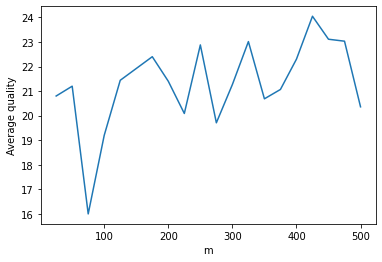

In [65]:
yank_graph(path_to_csv='benchmarking_results/testing_m_ptas.csv',
          target_var_name='m',
          column_name='Average quality',
          path_to_fig='benchmarking_results/figs/m_ptas_quality.png')